In [914]:
import pandas as pd
import numpy as np
from datetime import date

In [915]:
main_df = pd.read_csv(r'/home/shua/Desktop/msc-ml-datamining/Machine_Learning/project/v2/data/difference_df.csv').drop(['Unnamed: 0'], axis = 1)

/tmp/ipykernel_27217/475018138.py:1: DtypeWarning: Columns (3,4,12,15,146,245,246,250,260,276,288,289,290,291,294,295,296,297,298,300,301,302,303,304,305,309,311,312,313,314,319,320,321,322,323,324,325,326,327,331,332,333,335,336,337,339,342,344,345,351,352,354,356,357,358,360,361,363,364) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv(r'/home/shua/Desktop/msc-ml-datamining/Machine_Learning/project/v2/data/difference_df.csv').drop(['Unnamed: 0'], axis = 1)


In [916]:
main_df.head()

,full_address,street,sale_year,prev_sale_year,sale_price,prev_sale_price,price_difference,address,street_b,city,...,Floor_min_tagged,Floor_std_tagged,Floor_mean_tagged,Walls_max_tagged,Walls_min_tagged,Walls_std_tagged,Walls_mean_tagged,Outview_tagged,Outview_std_tagged,s_tagged
0,"3913 York Boulevard, Los Angeles, CA 90065 Sol...",3913 york blvd,2021,2019.0,1030000.0,725000.0,305000.0,"3913 york boulevard, los angeles, ca 90065 sol...",3913 york blvd,los angeles,...,2.0,1.0,4.0,5.0,2.0,1.0,5.0,2.0,1.0,NaN
1,"3913 York Boulevard, Los Angeles, CA 90065 Sol...",3913 york blvd,2019,NaN,725000.0,NaN,NaN,"3913 york boulevard, los angeles, ca 90065 sol...",3913 york blvd,los angeles,...,2.0,1.0,3.0,5.0,2.0,1.0,4.0,2.0,1.0,NaN
2,"4171 Division Street, Los Angeles, CA 90065 So...",4171 division st,2020,2015.0,905000.0,680000.0,225000.0,"4171 division street, los angeles, ca 90065 so...",4171 division st,los angeles,...,2.0,1.0,4.0,5.0,2.0,1.0,4.0,2.0,1.0,NaN
3,"4171 Division Street, Los Angeles, CA 90065 So...",4171 division st,2015,NaN,680000.0,NaN,NaN,"4171 division street, los angeles, ca 90065 so...",4171 division st,los angeles,...,2.0,1.0,4.0,5.0,2.0,1.0,3.0,2.0,0.0,NaN
4,"4234 Palmero Drive, Los Angeles, CA 90065 Sold...",4234 palmero dr,2020,2017.0,1260000.0,844000.0,416000.0,"4234 palmero drive, los angeles, ca 90065 sold...",4234 palmero dr,los angeles,...,2.0,1.0,3.0,5.0,2.0,1.0,4.0,2.0,1.0,NaN


In [917]:
main_df.shape

(4339, 391)

The dataset contains sales of houses in the Los Angeles area. The feature set is rather large-- 391 columns. Let's take a look and see how many of these are actually useable

In [918]:
#filter the dataframe to only include columns with at least 50% fill rates
main_df.loc[:, main_df.isnull().mean() < .5].shape

(4339, 245)

With a threshold of 50% fill rates, we managed to remove about 35% of the columns. Lets see what columns we have left:

In [919]:
filtered_df = main_df.loc[:, main_df.isnull().mean() < .5]
filtered_df.iloc[:, :90].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 90 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   full_address                               4339 non-null   object 
 1   street                                     4339 non-null   object 
 2   sale_year                                  4339 non-null   object 
 3   prev_sale_year                             2212 non-null   object 
 4   sale_price                                 4339 non-null   float64
 5   prev_sale_price                            2212 non-null   float64
 6   price_difference                           2212 non-null   float64
 7   address                                    4339 non-null   object 
 8   street_b                                   4339 non-null   object 
 9   city                                       4339 non-null   object 
 10  state                   

In [920]:
filtered_df.iloc[:, 90:180].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 90 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ids.quantariumUrn                         4327 non-null   float64
 1   ids.fipsCode                              4339 non-null   int64  
 2   ids.personIds                             4339 non-null   object 
 3   involuntaryLien.liens                     4339 non-null   object 
 4   legal.legalDescription                    4339 non-null   object 
 5   legal.lotNumber                           4054 non-null   object 
 6   legal.cityTownshipMunicipality            4339 non-null   object 
 7   legal.tractNumber                         4319 non-null   object 
 8   lot.lotSizeAcres                          4333 non-null   float64
 9   lot.lotDepthFeet                          2886 non-null   float64
 10  lot.lotFrontageFeet                 

In [921]:
filtered_df.iloc[:, 180:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   sale.lastSale.price                      4304 non-null   float64
 1   sale.lastSale.priceCodeDescription       3954 non-null   object 
 2   sale.lastSale.priceCode                  4192 non-null   float64
 3   sale.lastSale.recordingDate              4330 non-null   object 
 4   sale.lastSale.saleDate                   4330 non-null   object 
 5   sale.lastSale.saleBuyers                 4339 non-null   object 
 6   sale.lastSale.saleSellers                4339 non-null   object 
 7   sale.lastSale.mortgages                  4330 non-null   object 
 8   sale.priorTransfer.saleBuyers            4339 non-null   object 
 9   sale.priorTransfer.saleSellers           4339 non-null   object 
 10  sale.priorSale.documentNumber            4306 no

Domain knowledge tells us that many of these features are un-useable/not helpful. This would include the general, valuation (data leak), quicklists, address, owner, and demographic categories. So we can remove these:

In [922]:
filtered_df.columns.str.lower()

Index(['full_address', 'street', 'sale_year', 'prev_sale_year', 'sale_price',
       'prev_sale_price', 'price_difference', 'address', 'street_b', 'city',
       ...
       'floor_max_tagged', 'floor_min_tagged', 'floor_std_tagged',
       'floor_mean_tagged', 'walls_max_tagged', 'walls_min_tagged',
       'walls_std_tagged', 'walls_mean_tagged', 'outview_tagged',
       'outview_std_tagged'],
      dtype='object', length=245)

In [923]:
# remove columns if column starts with any of general, valuation, quicklists, address, owner, and demographic, ids, and categories
filtered_df = filtered_df.loc[:, ~filtered_df.columns.str.lower().str.startswith('general')]
filtered_df = filtered_df.loc[:, ~filtered_df.columns.str.lower().str.startswith('valuation')]
filtered_df = filtered_df.loc[:, ~filtered_df.columns.str.lower().str.startswith('quicklists')]
filtered_df = filtered_df.loc[:, ~filtered_df.columns.str.lower().str.startswith('address')]
filtered_df = filtered_df.loc[:, ~filtered_df.columns.str.lower().str.startswith('owner')]
filtered_df = filtered_df.loc[:, ~filtered_df.columns.str.lower().str.startswith('demographic')]
filtered_df = filtered_df.loc[:, ~filtered_df.columns.str.lower().str.startswith('ids')]
filtered_df = filtered_df.loc[:, ~filtered_df.columns.str.lower().str.startswith('categories')]
filtered_df.shape


(4339, 147)

In [924]:
#Search through the filtered_df and print a dataframe of just the object columns
object_df = filtered_df.select_dtypes(include=['object'])
object_df.head()

,full_address,street,sale_year,prev_sale_year,street_b,city,state,zip,sold_month,sold_day,...,sale.priorSale.recordingDate,sale.priorSale.saleDate,sale.priorSale.saleBuyers,sale.priorSale.saleSellers,sale.priorSale.mortgages,tax.taxRateCodeArea,meta.importEvents,meta.requestId,date_sold_tagged,sub_type_tagged
0,"3913 York Boulevard, Los Angeles, CA 90065 Sol...",3913 york blvd,2021,2019.0,3913 york blvd,los angeles,ca,90065,may,17,...,2019-05-15T00:00:00.000Z,2019-05-09T00:00:00.000Z,['Spencer Scott William'],['West Adams Group Llc'],"[{'documentNumber': '2019.443302', 'pageNumber...",00-013,[],r2H7QRoLHH,2021-05-17 00:00:00,S
1,"3913 York Boulevard, Los Angeles, CA 90065 Sol...",3913 york blvd,2019,NaN,3913 york blvd,los angeles,ca,90065,may,15,...,2019-05-15T00:00:00.000Z,2019-05-09T00:00:00.000Z,['Spencer Scott William'],['West Adams Group Llc'],"[{'documentNumber': '2019.443302', 'pageNumber...",00-013,[],r2H7QRoLHH,2019-05-15 00:00:00,S
2,"4171 Division Street, Los Angeles, CA 90065 So...",4171 division st,2020,2015.0,4171 division st,los angeles,ca,90065,december,4,...,2015-07-22T00:00:00.000Z,2015-06-19T00:00:00.000Z,"['Vergara Ryan Trajan', 'Vergara Tracy Liu']",['Berman Shane Michael'],"[{'documentNumber': '2015.887850', 'pageNumber...",00-004,[],GR0zGKANLk,2020-12-04 00:00:00,S
3,"4171 Division Street, Los Angeles, CA 90065 So...",4171 division st,2015,NaN,4171 division st,los angeles,ca,90065,july,22,...,2015-07-22T00:00:00.000Z,2015-06-19T00:00:00.000Z,"['Vergara Ryan Trajan', 'Vergara Tracy Liu']",['Berman Shane Michael'],"[{'documentNumber': '2015.887850', 'pageNumber...",00-004,[],GR0zGKANLk,2015-07-22 00:00:00,S
4,"4234 Palmero Drive, Los Angeles, CA 90065 Sold...",4234 palmero dr,2020,2017.0,4234 palmero dr,los angeles,ca,90065,september,24,...,2017-03-17T00:00:00.000Z,2017-02-09T00:00:00.000Z,"['Hoffman Matthew Justin', 'Shelley Noelle Mar...","['Kim Sang Jean', 'Choi David T']","[{'documentNumber': '2017.304648', 'pageNumber...",00-004,[],IjNuIQ38sN,2020-09-24 00:00:00,S


As we can see, not all of the features in our dataset are numerical, and will require a decent amount of pre-processing (and thereby feature selection, as not all seem to be able to go through any helpful transoformations).

Two features we can see are actually holding dictionaries: building.features, and homeownerAssociations. Both of these we can sparse later, and get valuable features from.

the general.propertyTypeDetail seems to be ordinal, and can apply an Ordinal Encoder to.

'building.styleCode', 'building.roofCover','building.exteriorWalls', 'building.heatSource', 'building.constructionType' are all columns which we can apply one hot encoding to.

In [925]:
# Search through the filtered dataframe and print a dataframe of the numeric columns
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])
numeric_df.head(30)

,sale_price,prev_sale_price,price_difference,assessment.assessedImprovementValue,assessment.assessedLandValue,assessment.totalAssessedValue,assessment.assessmentYear,building.totalBuildingAreaSquareFeet,building.yearBuilt,building.effectiveYearBuilt,...,Floor_max_tagged,Floor_min_tagged,Floor_std_tagged,Floor_mean_tagged,Walls_max_tagged,Walls_min_tagged,Walls_std_tagged,Walls_mean_tagged,Outview_tagged,Outview_std_tagged
0,1030000.0,725000.0,305000.0,149432,597728,747160,2021,1121.0,1939.0,2005.0,...,5.0,2.0,1.0,4.0,5.0,2.0,1.0,5.0,2.0,1.0
1,725000.0,NaN,NaN,149432,597728,747160,2021,1121.0,1939.0,2005.0,...,5.0,2.0,1.0,3.0,5.0,2.0,1.0,4.0,2.0,1.0
2,905000.0,680000.0,225000.0,181000,724000,905000,2021,1250.0,1947.0,1947.0,...,5.0,2.0,1.0,4.0,5.0,2.0,1.0,4.0,2.0,1.0
3,680000.0,NaN,NaN,181000,724000,905000,2021,1250.0,1947.0,1947.0,...,5.0,2.0,1.0,4.0,5.0,2.0,1.0,3.0,2.0,0.0
4,1260000.0,844000.0,416000.0,302600,957400,1260000,2021,1258.0,1955.0,1955.0,...,5.0,2.0,1.0,3.0,5.0,2.0,1.0,4.0,2.0,1.0
5,844000.0,NaN,NaN,302600,957400,1260000,2021,1258.0,1955.0,1955.0,...,5.0,2.0,1.0,4.0,5.0,2.0,1.0,4.0,2.0,1.0
6,1317000.0,865000.0,452000.0,267745,606216,873961,2021,1210.0,1957.0,1957.0,...,5.0,2.0,1.0,3.0,5.0,2.0,1.0,4.0,2.0,1.0
7,865000.0,NaN,NaN,267745,606216,873961,2021,1210.0,1957.0,1957.0,...,5.0,2.0,1.0,4.0,5.0,2.0,1.0,3.0,2.0,0.0
8,1205000.0,540000.0,665000.0,321660,589710,911370,2021,1206.0,1925.0,1935.0,...,5.0,2.0,1.0,3.0,5.0,2.0,1.0,4.0,2.0,1.0
9,540000.0,NaN,NaN,321660,589710,911370,2021,1206.0,1925.0,1935.0,...,5.0,2.0,1.0,3.0,5.0,2.0,1.0,3.0,2.0,0.0


There are some really valuable features here. However, there are many redundant columns (for example, there are several data sources giving the same information, like the mls and building categories both having the building counts.) Other columns are irrelevant, as they represent id codes that can't be used, or document numbers.

For some of the redundant columns though, we can still use them in order to fill in each others missing values, and only keep one of them. We will do this later.

The assessment columns look extremely useful, but from an initial look, it seems like they represent some sort of data leakage. Furter research needs to be done on these columns before using them.

In summary, we will be using the following columns for prediction and pre-processing:

In [926]:
address = ['address.houseNumber', 'street', 'city',
        'state', 'zip', 'address.zipPlus4', 'sold_month'
       ] #'address.latitude', 'address.longitude'

continuous = ['building.totalBuildingAreaSquareFeet',
       # 'building.unitCount',
       'building.bedroomCount', #'building.calculatedBathroomCount'
       'building.fullBathroomCount', 'building.bathroomCount',
       'lot.lotDepthFeet', 'lot.lotSizeSquareFeet','mls.lotSizeSquareFeet', 'mls.bedroomCount', 
       'building.storyCount', 'mls.floorCount', 'mls.bathroomCount',  'building.buildingQualityCode','sale.priorSale.price', 'prev_sale_price',#'assessment.totalAssessedValue'

       'bedrooms_tagged',
       'living_area_tagged',
       'Bathroom_max_tagged',
       'Bathroom_min_tagged',
       'Bathroom_std_tagged',
       'Bathroom_mean_tagged',
       'Floor_max_tagged',
       'Floor_min_tagged',
       'Floor_std_tagged',
       'Floor_mean_tagged',
       'Walls_max_tagged',
       'Walls_min_tagged',
       'Walls_std_tagged',
       'Walls_mean_tagged',
       'Outview_tagged',
       'Outview_std_tagged',
       'Kitchen_level_tagged',
       'Kitchen_level_std_tagged']

    
#Notes: Need to reverse the ordinality of the buildingQualityCode

ordinal = ['general.propertyTypeDetail'] 

one_hot = ['building.styleCode', 'building.roofCover','building.exteriorWalls', 'building.heatSource', 'building.constructionType'] #'mls.heatingTypes', 'mls.coolingTypes'

to_sparse = ['building.features', 'homeownerAssociations']

# not_sure = [ 'building.heatSourceCode'] #OneHot? What to do with new values?

### Understanding the Target Variable

There are a couple of columns which relate to the Target variable:

In [927]:
#sale_price	prev_sale_price, sale.lastSale.price, sale.priorSale.price
targets = main_df.loc[:, ['sale.lastSale.price', 'sale.priorSale.price', 'sale_price', 'prev_sale_price']]
targets.head(10)

,sale.lastSale.price,sale.priorSale.price,sale_price,prev_sale_price
0,1030000.0,725000.0,1030000.0,725000.0
1,1030000.0,725000.0,725000.0,NaN
2,905000.0,680000.0,905000.0,680000.0
3,905000.0,680000.0,680000.0,NaN
4,1260000.0,844000.0,1260000.0,844000.0
5,1260000.0,844000.0,844000.0,NaN
6,1317000.0,865000.0,1317000.0,865000.0
7,1317000.0,865000.0,865000.0,NaN
8,1205000.0,850000.0,1205000.0,540000.0
9,1205000.0,850000.0,540000.0,NaN


Our data set is comprised of two data sources regarding the target variable: The sale price and previous sale priced as collected by the data taggers, and the sale price and prev sale price as retrieved from the API call.

In [928]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sale.lastSale.price   4304 non-null   float64
 1   sale.priorSale.price  4292 non-null   float64
 2   sale_price            4339 non-null   float64
 3   prev_sale_price       2212 non-null   float64
dtypes: float64(4)
memory usage: 135.7 KB


We can see that the taggers sale price is more filled than the API cal. However, for production, the api call is the data source which will be using. Therefore, our main target column will be the API call's sale.lastSale.price, but we will use the tagger's data to fill in any missing values.

Another decision to be made, is which rows we will keep: The dataset consists of multiple sales for each house. As we can see, the oldest sale of the house doesn't have a prev_sale value. This is because the data is unknown to us (the api call only retrieves the most recent sale and prev_sale prices.) Most machine learning algorithms don't know how to calculate for null values, and therefore these rows will probably have to be dropped.

A solution could be is to aggregate the information of the prev_sale row into the current sale row (such as the tagged quality of the rooms, floors, and walls).

Another may be, that gradient boosting methods such as XGboost know how to account for NA values, and the rows could be salvaged there.

For now we will drop the prev_sale rows, and re-evaluate after our initial modeling. First,  we wil do some quick clean up o the target variable.

In [929]:
# main_df = main_df.dropna(subset = ['prev_sale_price']) #drop all rows without a target value

#### Clean the Target Variable

In [930]:
# main_df['sale.lastSale.price'] = main_df['sale.lastSale.price'].astype('int64', errors = 'ignore')
# main_df['sale.priorSale.price'] = main_df['sale.priorSale.price'].astype(int, errors = 'ignore')
# main_df['sale_price'] = main_df['sale_price'].astype(int, errors = 'ignore')
# main_df['prev_sale_price'] = main_df['prev_sale_price'].astype(int, errors = 'ignore')

In [931]:
main_df['sale.lastSale.price'].dtype

dtype('float64')

In [932]:
#get rows from dataframe where pre_sale_price is null

In [933]:
#fill sale.priorSale.price with prior_sale_price
is_null = main_df[main_df['prev_sale_price'].isnull()]
df = main_df.dropna(subset = ['prev_sale_price']) #drop all rows without a target value
print(df.shape)
df['sale.priorSale.price'] = df['sale.priorSale.price'].fillna(df['prev_sale_price'])
#fill sale.priorSale.saleDate with prev_sale_date
df['sale.priorSale.saleDate'] = df['sale.priorSale.saleDate'].fillna(df['prev_sale_year'])
#where sale.lastSale.price is equal to sale.priorSale.price, fill sale.priorSale.price with lower of sale_price and prev_sale_price
def fill_sale_nulls(row):
    # try:
    if row['sale.lastSale.price'] == row['sale.priorSale.price']:
        row['sale.priorSale.price'] = min(row['sale_price'], row['prev_sale_price'])
        try:
            row['sale.priorSale.saleDate'] = min(row['sale_year'], row['prev_sale_year'])
        except:
            if row['sale_year'] is None:
                row['sale.priorSale.saleDate'] = row['prev_sale_year']
            else:
                row['sale.priorSale.saleDate'] = row['sale_year']
        if row['sale.priorSale.saleDate'] is None:
            row['sale.priorSale.saleDate'] = row['sale_year']
    # except:
    #     print(row['sale.lastSale.price'], row['sale.priorSale.price'], row['sale_price'], row['prev_sale_price'])
    return row

df[df['sale.lastSale.price'] == df['sale.priorSale.price']] = df[df['sale.lastSale.price'] == df['sale.priorSale.price']].apply(fill_sale_nulls, axis = 1, )

main_df = df.append(is_null).sort_index()


(2212, 391)


/tmp/ipykernel_27217/419640244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sale.priorSale.price'] = df['sale.priorSale.price'].fillna(df['prev_sale_price'])
/tmp/ipykernel_27217/419640244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sale.priorSale.saleDate'] = df['sale.priorSale.saleDate'].fillna(df['prev_sale_year'])
/tmp/ipykernel_27217/419640244.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [934]:
target = ['sale.lastSale.price']
target_year = ['sale.lastSale.saleDate']
# assessments = ['sale.priorSale.price', 'assessment.totalAssessedValue'] #Assessment imprvoed, assessment land
#Assessment year MUST BE the first entryy in the list
years = [target_year[0], 'sale.priorSale.saleDate', 'building.yearBuilt'] #'assessment.assessmentYear'
price_year_pairings = [ ('sale.priorSale.price', 'sale.priorSale.saleDate'), (target[0], target_year[0])] #('assessment.totalAssessedValue', 'assessment.assessmentYear'),

In [935]:
features = [address, continuous, ordinal, years, target, one_hot, to_sparse]
features = [x for y in features for x in y]
print( f' df rows: {main_df.shape[0]}, columns: {len(features)}')

 df rows: 4339, columns: 51


In [936]:
df = main_df.loc[:, features]
df

,address.houseNumber,street,city,state,zip,address.zipPlus4,sold_month,building.totalBuildingAreaSquareFeet,building.bedroomCount,building.fullBathroomCount,...,sale.priorSale.saleDate,building.yearBuilt,sale.lastSale.price,building.styleCode,building.roofCover,building.exteriorWalls,building.heatSource,building.constructionType,building.features,homeownerAssociations
0,3913,3913 york blvd,los angeles,ca,90065,3718,may,1121.0,2.0,2.0,...,2019-05-09T00:00:00.000Z,1939.0,1030000.0,15.0,Composition Shingle,Stucco,Central,Wood,"['Air Conditioning', 'Fireplace']","[{'type': 'PUD', 'feeAmount': 1200, 'feeFreque..."
1,3913,3913 york blvd,los angeles,ca,90065,3718,may,1121.0,2.0,2.0,...,2019-05-09T00:00:00.000Z,1939.0,1030000.0,15.0,Composition Shingle,Stucco,Central,Wood,"['Air Conditioning', 'Fireplace']","[{'type': 'PUD', 'feeAmount': 1200, 'feeFreque..."
2,4171,4171 division st,los angeles,ca,90065,4205,december,1250.0,2.0,1.0,...,2015-06-19T00:00:00.000Z,1947.0,905000.0,15.0,Composition Shingle,Stucco,Floor/Wall,Wood,[],[]
3,4171,4171 division st,los angeles,ca,90065,4205,july,1250.0,2.0,1.0,...,2015-06-19T00:00:00.000Z,1947.0,905000.0,15.0,Composition Shingle,Stucco,Floor/Wall,Wood,[],[]
4,4234,4234 palmero dr,los angeles,ca,90065,4251,september,1258.0,2.0,2.0,...,2017-02-09T00:00:00.000Z,1955.0,1260000.0,15.0,Composition Shingle,Stucco,Central,Wood,['Fireplace'],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,2013,2013 n corlett ave,los angeles,ca,90059,3626,december,1796.0,4.0,2.0,...,2016-12-19T00:00:00.000Z,1945.0,355000.0,NaN,NaN,NaN,Floor/Wall,Wood,[],"[{'type': 'HOA', 'feeAmount': 400, 'feeFrequen..."
4335,2307,2307 e 120th st,los angeles,ca,90059,2629,august,753.0,2.0,1.0,...,2016-08-25T00:00:00.000Z,1915.0,560000.0,NaN,NaN,NaN,NaN,Wood,[],"[{'type': 'HOA', 'feeAmount': 300, 'feeFrequen..."
4336,2307,2307 e 120th st,los angeles,ca,90059,2629,november,753.0,2.0,1.0,...,2016-08-25T00:00:00.000Z,1915.0,560000.0,NaN,NaN,NaN,NaN,Wood,[],"[{'type': 'HOA', 'feeAmount': 300, 'feeFrequen..."
4337,11709,11709 compton ave,los angeles,ca,90059,1826,march,744.0,4.0,1.0,...,2017-03-20T00:00:00.000Z,1927.0,255000.0,15.0,Composition Shingle,Stucco,Floor/Wall,Wood,[],"[{'type': 'HOA', 'feeAmount': 700, 'feeFrequen..."


In [937]:
df.dropna(subset = [target[0], target_year[0]], inplace= True) #drop all rows without a target value
df.replace('nan', np.nan, inplace = True) #replace all 'nan' strings with np.nan
df.shape[0]

4304

# Impute/Pre-Process

In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 0 to 4338
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   address.houseNumber                   4304 non-null   int64  
 1   street                                4304 non-null   object 
 2   city                                  4304 non-null   object 
 3   state                                 4304 non-null   object 
 4   zip                                   4304 non-null   object 
 5   address.zipPlus4                      4304 non-null   int64  
 6   sold_month                            4304 non-null   object 
 7   building.totalBuildingAreaSquareFeet  4300 non-null   float64
 8   building.bedroomCount                 4300 non-null   float64
 9   building.fullBathroomCount            4302 non-null   float64
 10  building.bathroomCount                4302 non-null   float64
 11  lot.lotDepthFeet 

In [939]:
# for col in ['prev_sale_year']:  
#     year = np.array(df[col])
#     for i, x in enumerate(year):
#         try:
#             int(x)
#         except:
#             if pd.isnull(x) == False:
#                 try:
#                     year[i] = int(x.replace('-', ''))
#                 except:
#                     year[i] = int(float(x))

#     df[col] = year

#### Fix "Year" Features

In [940]:
def take_year(x):
    try:
        x = x.split('-')
        x = int(x[0])
    except:
        x = int(float(x))
    return x

current_year = int(date.today().year)
for year in years:
    print(year)
    
    #if year is an integer, fillna with mode. If year is a float, convert to int while handling the nan values.
    if df[year].dtype == 'int64':
        print('int64')
        df[year].fillna(df[year].mode()[0], inplace = True)
    elif df[year].dtype == 'float64':
        print('float64')
        df[year].fillna(df[year].mode()[0], inplace = True)
        df[year] = df.loc[:, year].astype(int)
        # df[df[year] > current_year] = current_year
    elif df[year].dtype == 'object':
        try:
            print('object')
            df[year].fillna(df[year].mode()[0], inplace=True)
            df[year] = df.loc[:, year].astype(int)

        except:
            print('else')
            df[year].fillna(df[year].mode()[0], inplace=True) #If not numerical, than apply the take_year function
            df[year] = df[year].apply(take_year)
            df.loc[:, year] = df.loc[:, year].astype(int)
    
    #drop row if length of the year string is not 4
    for x in df[year]:
        if len(str(x))<4 or len(str(x))>4:
            df.drop(df[df[year] == x].index, inplace = True)
        # df[df[year] > current_year] = current_year


sale.lastSale.saleDate
object
else
sale.priorSale.saleDate
object
else
building.yearBuilt
float64


#### Adjust Prices for Inflation

In [941]:
#Apply current price adjusted for inflation
from datetime import datetime
import cpi
def apply_cpi(x, price_col, year_col):
    if pd.isnull(x.loc[price_col]) == False or x.loc != None:
        price = x.loc[price_col]
        year = x.loc[year_col]
        month_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        month = x.loc['sold_month'][:3].lower()
        if month not in month_names:
            month = 'jan'
        if year == 2022 and month =='dec':
            month = 'nov'
        #convert month to its numerical value
        date_string = f"{year} {month}"
        date = datetime.strptime(date_string, "%Y %b")

        # if year != current_year:
            # print(price, year)
            #combine year and month to datetime format to get the correct CPI value
        # year = str(year) + '-' + str(month)
        val = cpi.inflate(price, date, items= 'Housing', )
        x.loc[price_col] = val
        return x
# df = df.apply(apply_cpi, args = ('sale.lastSale.price', 'sale.lastSale.saleDate'), axis = 1)
# df = df.apply(apply_cpi, args = ('assessment.totalAssessedValue', 'assessment.assessmentYear'), axis = 1)
for pair in price_year_pairings:
    print(pair)
    df = df.apply(apply_cpi, args = (pair), axis =1)

('sale.priorSale.price', 'sale.priorSale.saleDate')
('sale.lastSale.price', 'sale.lastSale.saleDate')


### Sparse House Features

In [1]:
to_sparse

NameError: name 'to_sparse' is not defined

In [943]:
houses_features = []
a = df.loc[:,['building.features']].values
for x in a:
    features_dict = {'AC': 0, 'Fireplace': 0, 'SolarHeat': 0, 'EvaporativeCooler': 0, 'AttachedGarage': 0, 'SpaorHotTub': 0, 'Spa': 0, 'Pool': 0, 'Garage': 0}
    for y in x:
        attr = y.replace("[", "").replace("]", "").replace("'", "").replace(" ", "").split(",")
        for item in attr:
            if "Conditioning" in item:
                if "Wall" in item:
                    features_dict['AC'] = 1
                elif "Central" in item:
                    features_dict['AC'] = 3
                else:
                    features_dict['AC'] = 2
            else:
                features_dict[item] = 1
    houses_features.append(features_dict)
features_df = pd.DataFrame(houses_features)
df = df.join(features_df).drop(['building.features'], axis = 1)

In [944]:
df.shape

(4304, 64)

### Sparse Homeowner Association

In [945]:
#grab the "type" and "amount" from the homeownerAssociations column. The column contains a dictionary with those two values

def get_hoa_type(x):
    if pd.isnull(x) == False:
        x = x.replace("[", "").replace("]", "").replace("'", "").replace(" ", "").split(",")
        for item in x:
            if 'type' in item:
                hoa = item.split(":")[1].replace("'", "").replace("}", "")
                return hoa
    else:
        return np.nan

def get_hoa_amount(x):
    if pd.isnull(x) == False:
        x = x.replace("[", "").replace("]", "").replace("'", "").replace(" ", "").split(",")
        for item in x:
            if 'feeAmount' in item:
                amount = int(item.split(":")[1].replace("'", "").replace("}", ""))
                return amount

    else:
        return np.nan

df['hoa_type'] = df.homeownerAssociations.apply(get_hoa_type)
df['hoa_amount'] = df.homeownerAssociations.apply(get_hoa_amount)
df.drop('homeownerAssociations', axis = 1, inplace = True)

Row Wise Fill-values (not overfit to the test set)

In [946]:
df.loc[:, 'mls.floorCount'].fillna(df.loc[:, 'building.storyCount'], inplace = True)
df.drop(['building.storyCount'], axis = 1, inplace = True)

df.loc[:, 'mls.bathroomCount'].fillna(df.loc[:, 'building.bathroomCount'], inplace = True)
df.drop(['building.bathroomCount'], axis = 1, inplace = True)

df.loc[:, 'mls.bedroomCount'].fillna(df.loc[:, 'building.bedroomCount'], inplace = True)
df.drop(['building.bedroomCount'], axis = 1, inplace = True)

df.loc[:, 'mls.lotSizeSquareFeet'].fillna(df.loc[:, 'lot.lotSizeSquareFeet'], inplace = True)
df.drop(['lot.lotSizeSquareFeet'], axis = 1, inplace = True)

df.loc[:, 'living_area_tagged'].fillna(df.loc[:, 'building.totalBuildingAreaSquareFeet'], inplace = True)
df.drop(['building.totalBuildingAreaSquareFeet'], axis = 1, inplace = True)
df.drop('', axis = 1, inplace = True)

In [947]:
df.drop(['Porch', 'SolarHeatedPool', 'Underground/BasementGarage', 'DetachedGarage'], axis = 1, inplace = True )

In [948]:
# fill in missing values with the mode of the building exterior walls
df.loc[:, 'building.exteriorWalls'].fillna(df.loc[:, 'building.exteriorWalls'].mode()[0], inplace = True)

In [949]:
#Fill Kitchen_level_tagged with average value
df.loc[:, 'Kitchen_level_tagged'].fillna(df.loc[:, ['Bathroom_mean_tagged', 'Floor_mean_tagged', 'Walls_mean_tagged']].mean(axis = 1), inplace = True)
df.loc[:, 'Kitchen_level_std_tagged'].fillna(df.loc[:, ['Bathroom_std_tagged', 'Floor_std_tagged', 'Walls_std_tagged']].mean(axis = 1), inplace = True)

In [950]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing = missing/df.shape[0]
missing

building.fullBathroomCount      0.000465
mls.bathroomCount               0.000465
mls.lotSizeSquareFeet           0.000929
mls.bedroomCount                0.000929
building.constructionType       0.002788
sale.priorSale.price            0.004414
Fireplace                       0.008132
AC                              0.008132
AttachedGarage                  0.008132
SpaorHotTub                     0.008132
Pool                            0.008132
SolarHeat                       0.008132
Garage                          0.008132
Spa                             0.008132
EvaporativeCooler               0.008132
building.buildingQualityCode    0.012546
mls.floorCount                  0.038801
building.heatSource             0.049257
hoa_type                        0.236524
building.styleCode              0.264870
hoa_amount                      0.309480
lot.lotDepthFeet                0.334805
building.roofCover              0.423095
prev_sale_price                 0.490242
dtype: float64

For the hoa type and the hoa amount, we can assume they are null intentionally-- they don't belong to an hoa.

In [951]:
#fill hoa_amount with 0, and hoa type with 'None'
df.loc[:, 'hoa_amount'].fillna(0, inplace = True)
df.loc[:, 'hoa_type'].fillna('None', inplace = True)

For the rest of the features, there isn't any specific explanation as to why they are missing. Therefore later, we will use more advanced imputation methods to fill them, once we split the dataset into train and test.

#### Check for Skew

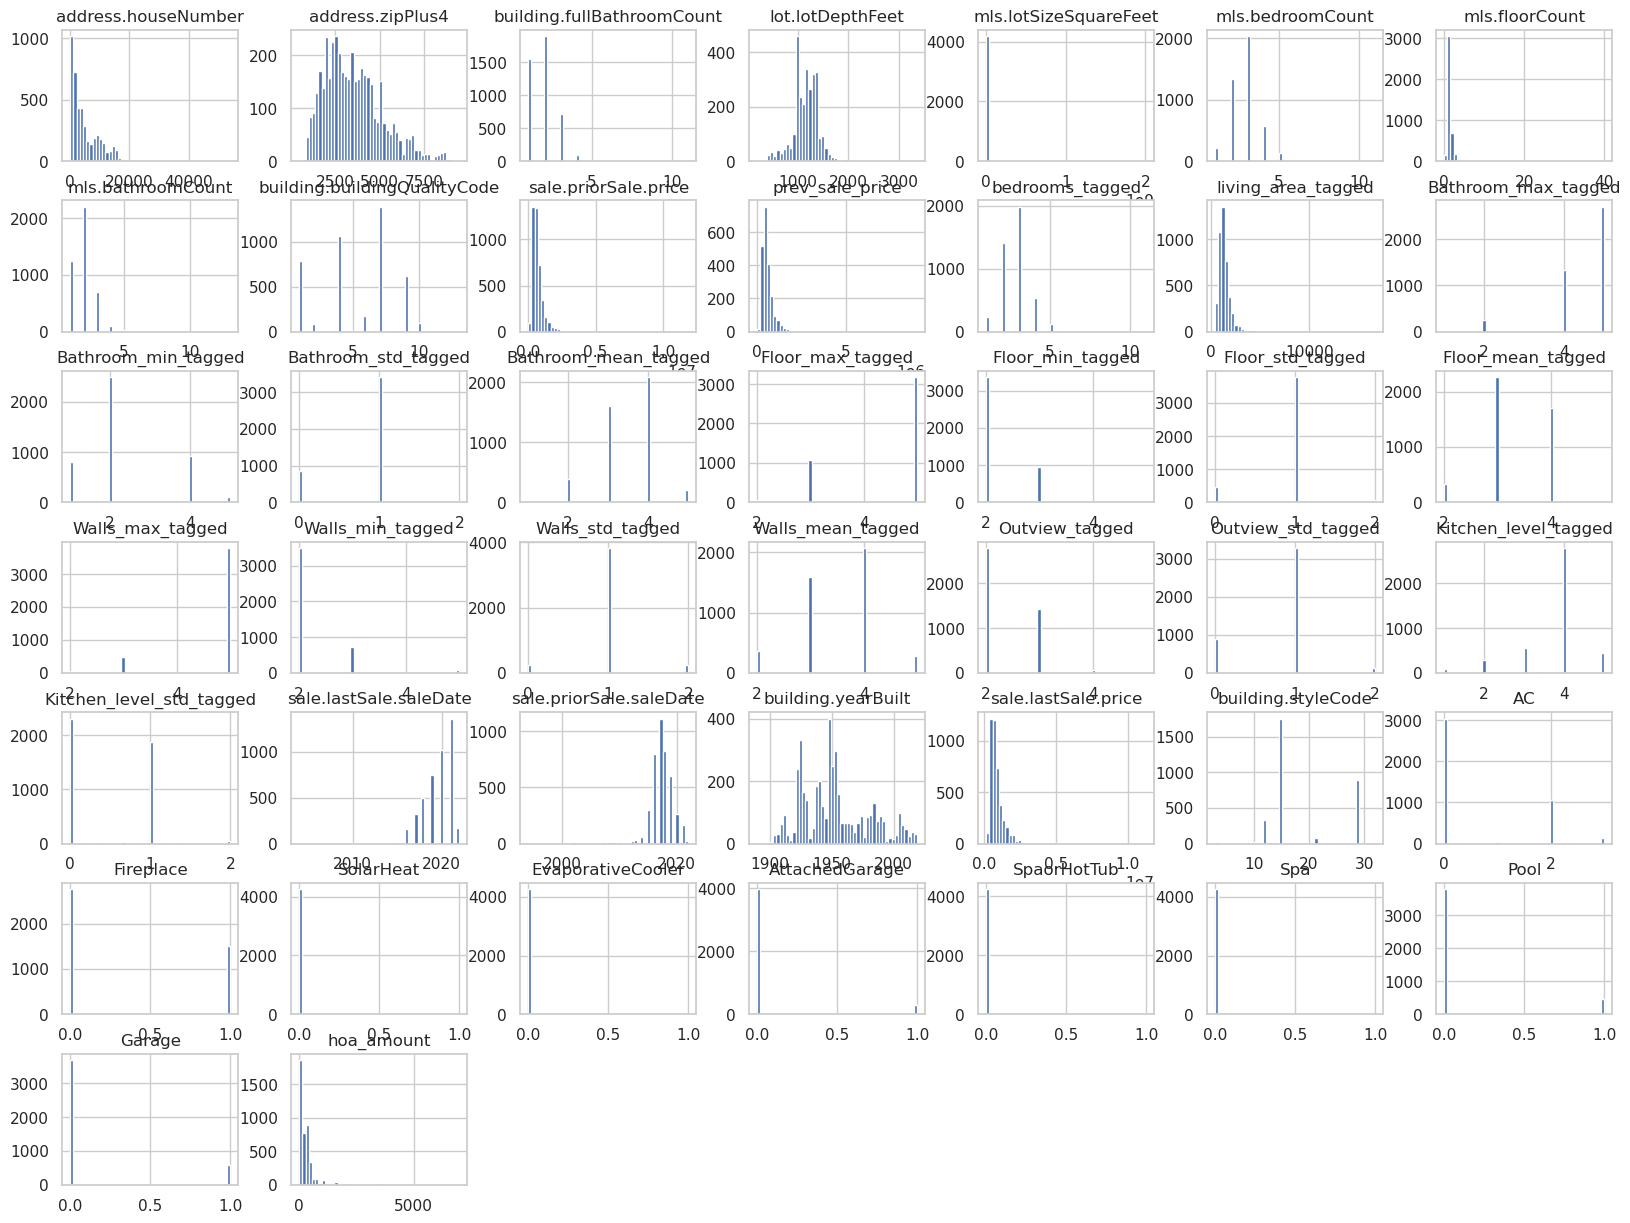

In [952]:
#Perform basic EDA on the dataset
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


A couple of the features here look skewed at first sight. But further understanding of the features shows that the apparent skew is more likely to do errant values. For example, the mls.floorCount feature is normal in the beginning, but then widens out to values which are unrealistic for floor counts.

Similarly with the hoa_amount. The large values might be due to the fact that the large amounts are yearly aggregates, as opposed to monthly aggregates like the rest of the rows.

These features should be handled with outlier removal. 

The skews which do seem to exist are in the pricing features, such as the target and the prior sale. It very well could be that fixing their skew could help.

#### Coorelations to the Target Variable

In [953]:
#more eda
import seaborn as sns

#show coorelations to the sale.lastSale.price variable where the correlation is greater than 0.5
corr_matrix = df.corr()
corr_matrix["sale.lastSale.price"].sort_values(ascending=False)
#now show only the coorelations that are greater than 0.5
corr_matrix["sale.lastSale.price"][corr_matrix["sale.lastSale.price"].abs() > 0.5].sort_values(ascending=False)



/tmp/ipykernel_27217/1885233291.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


sale.lastSale.price           1.000000
sale.priorSale.price          0.957923
prev_sale_price               0.951123
living_area_tagged            0.703995
mls.bathroomCount             0.539528
building.fullBathroomCount    0.537573
Name: sale.lastSale.price, dtype: float64

In [954]:
df.to_csv('/home/shua/Desktop/msc-ml-datamining/Machine_Learning/project/v2/data/cleansed_df.csv')